# Import raw dataset

In [5]:
# This function allows to import the txt file containing the lyrics of the songs
def read_file(file):
    '''Reads Whatsapp text file into a list of strings'''
    text = open(file,'r', encoding = 'utf-8')
    text_read = text.readlines()
    return text_read

In [6]:
# After this function is called, a list of strings is created
lyrics = read_file("lyrics.txt")

In [7]:
# To avoid linespaces and similars, we replace them with a single space
def clean_lines(texto):
    '''Clean whitespaces and newlines'''
    texto_list = [i.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').strip() for i in texto]
    return [line for line in texto_list if len(line)>0]

In [8]:
# After this function is called, a list of strings is cleaned by this method
texto_raw = ' '.join(clean_lines(lyrics))

# Parse data in two lists

In [9]:
# This function allow us to parse the list using a regular expression
import re

def parse_re(texto):
    '''Parse Whatsapp chat using re into a tuple of five elements'''
    pat = re.compile(r'Artist:(.*?),\s(.*?)\d+EmbedShare\sURLCopyEmbedCopy\s<\|endoftext\|>\s')
    parsed = re.findall(pat, texto)
    return parsed

In [10]:
# After this function is called, the list is parsed by this method
parsed = parse_re(texto_raw)

In [11]:
# This function allows to create two different lists containing the lyrics of the songs and the artists, since the previously performed parsing allow us to extract the lyrics and the artists
def get_lists(lista):
    '''Give back a list of artists and a list of corpus text'''
    artists = [item[0] for item in parsed]
    corpus = [item[1] for item in parsed]
    return artists, corpus

In [12]:
# After this function is called, the parsed list is splitted into two lists
artists, corpus = get_lists(parsed)

# Preprocess data

In [15]:
import nltk

from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

from nltk.stem import PorterStemmer
pst = PorterStemmer()

# This function allows to perform the preprocessing of the corpus list and creates a list of lists, 
# ... stripping, lower cassing, removing punctuation signs, tokenizing and lemmatizing

def preprocessing(doc):
   '''Perform a basic preprocessing of the corpus'''
   # Remove double space
   doc = doc.strip()

   # Lower
   doc = doc.lower()

   # Remover punctuation signs
   doc = re.sub(r'[^\w]', ' ', doc)
   doc = doc.strip()

   # Tokenize and lemmatize
   tokens = tokenizer.tokenize(doc)
   final = [[pst.stem(token) for token in sentence.split(" ")] for sentence in tokens]
   final = [''.join(ele) for ele in final]

   return final

In [16]:
# After this function is called, the corpus list is preprocessed by this method, using the map method
norm_corpus = list(map(preprocessing, corpus))

In [17]:
# After the preprocessing, we can check the number of values left in the list, grouping them by artists
import pandas as pd
df_check = pd.concat([
    pd.Series(artists),
    pd.DataFrame([' '.join(item) for item in norm_corpus])],
    axis=1)

df_check.columns = ['artist', 'lyrics']
df_check.groupby('artist').lyrics.apply(lambda x: len(str(x).split(" "))).sort_values(ascending=False)

artist
Fall Out Boy               385
The Strokes                377
Nine Inch Nails            372
All Time Low               370
David Bowie                365
MGMT                       363
The Smiths                 363
Bring Me The Horizon       361
Muse                       359
My Chemical Romance        359
Foo Fighters               358
Motionless In White        355
Beach House                355
Vampire Weekend            354
Depeche Mode               354
Radiohead                  354
Interpol                   354
Panic At The Disco         353
Thirty Seconds To Mars     351
The Rolling Stones         351
Bob Dylan                  350
Tame Impala                349
Blink-182                  348
Gorillaz                   348
Red                        344
Franz Ferdinand            341
Korn                       337
Angel Olsen                337
Nick Cave the Bad Seeds    336
Grimes                     335
Disturbed                  331
Architects                 330
a

# Explore text data

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
plt.style.use("ggplot")

# We create a function that allows to plot the word cloud, considering the lyrics of the songs of every artist

def define_word_cloud(strings_list):
   
    wordcloud  = WordCloud(width = 1000, height = 600, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False).generate(strings_list)
    return wordcloud

def cloud_elements(wordcloud):
   
    
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

def plot_word_cloud(strings_list):
    cloud_elements(define_word_cloud(strings_list))

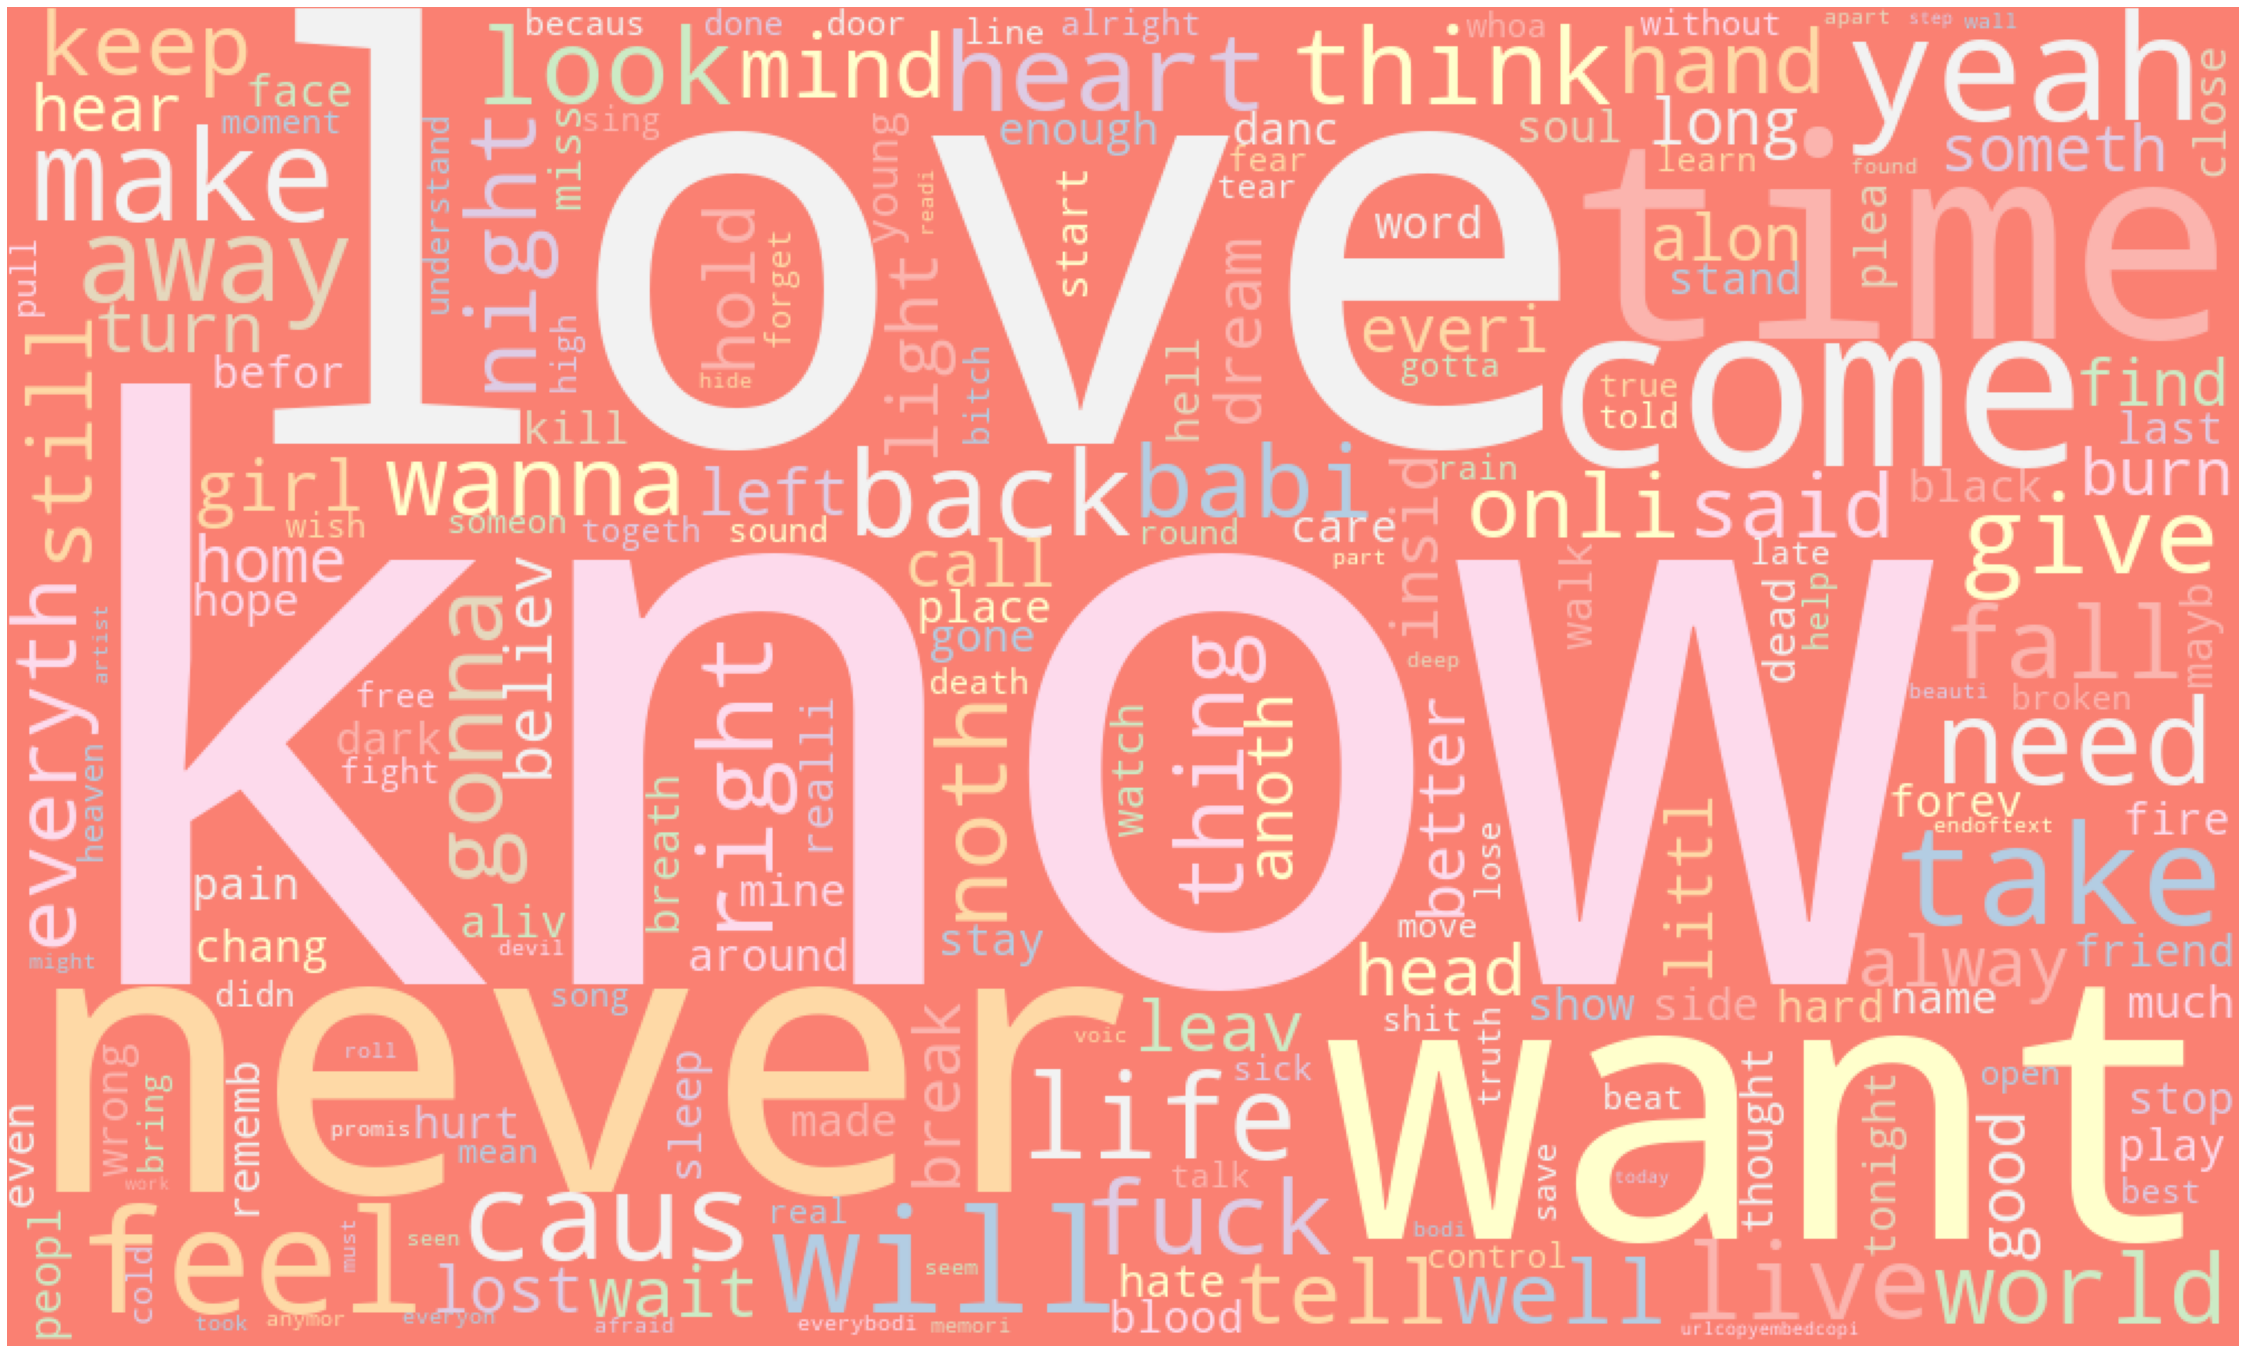

In [19]:
# We consider only the words that are longer than 3 characters
# Then, we plot it, using the plot_word_cloud function

words = [item for sublist in norm_corpus for item in sublist]
words = [word for word in words if len(word) > 3]
words = ' '.join(words)

plot_word_cloud(words)

In [20]:
# We also can plot the frequency of the words, using the freq_words function

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def freq_words(tokens):
    freq_dist = nltk.FreqDist(tokens)
    most_common = pd.DataFrame(freq_dist.most_common()[:20], columns = ["Word", "Conteo"])
    y = most_common["Conteo"]
    x = most_common["Word"]
    return x,y

def most_common_plot(x,y):

    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(x, minor=False)
    for i, v in enumerate(y):
        ax.text(v, i, str(v), color='black', fontweight='bold')
    plt.title('Word frequence')
    plt.xlabel('Quantity')
    plt.ylabel('Most frequent words')
    fig.set_size_inches(18.5, 10.5)
    plt.show()

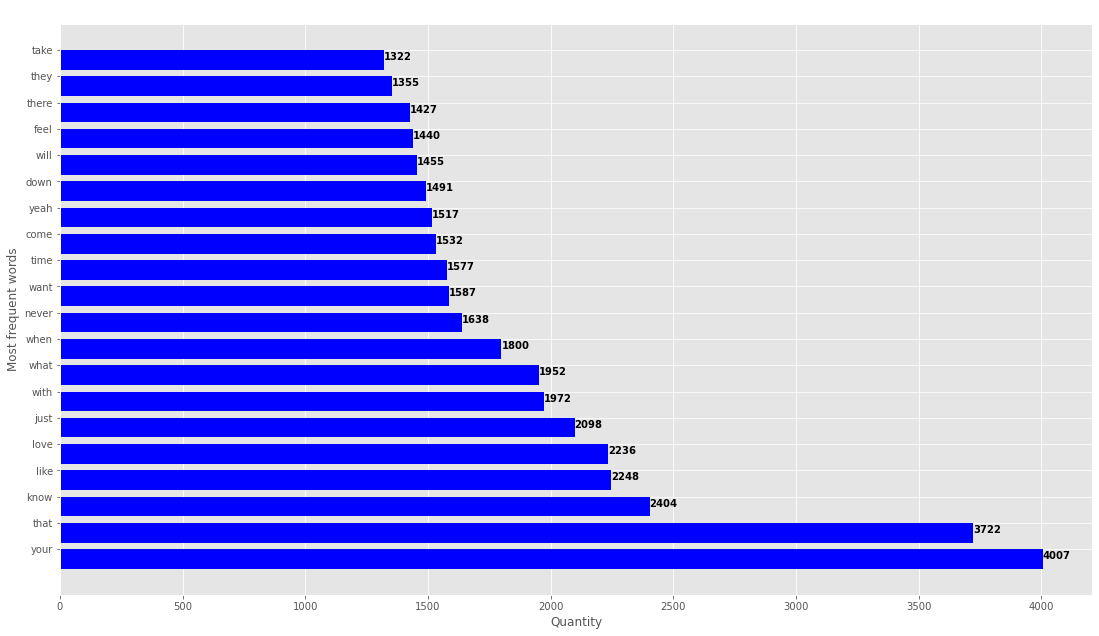

In [21]:
# After this function is called, the most common words are plotted by this method
x, y = freq_words(words.split(" "))
most_common_plot(x,y)

In [22]:
# We use the textblob package, to get a sentiment polarity coefficient

from textblob import TextBlob
import seaborn as sns

def get_polarity(doc):
    return float(TextBlob(doc).sentiment.polarity)

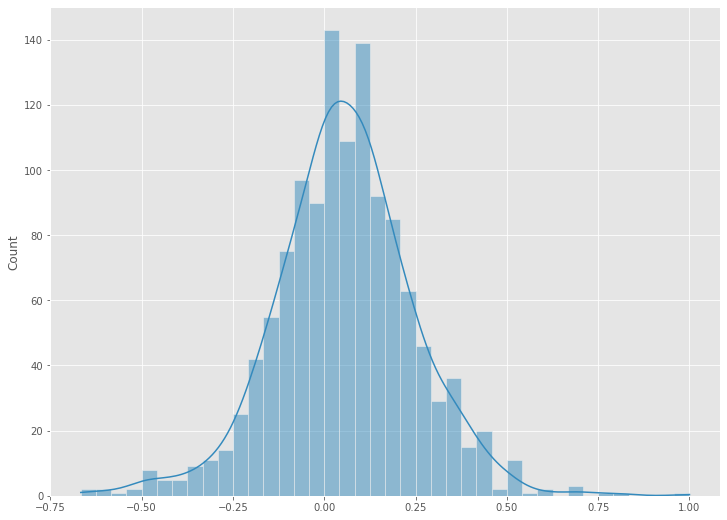

The mean of polarity score in this database is 0.06 and its median is 0.05


In [23]:
# We prepare the corpus list, and plot the distribution of the polarity coefficients

norm_corpus_list = [' '.join(item) for item in norm_corpus]
polarity_score = list(map(get_polarity, norm_corpus_list))

plt.figure(figsize = (12,9))
ax = sns.histplot(data = polarity_score, 
             kde = True)
plt.show()

mean_data = "{:.2f}".format(np.mean(polarity_score))
median_data = "{:.2f}".format(np.median(polarity_score))
print(f"The mean of polarity score in this database is {mean_data} and its median is {median_data}")

In [24]:
# We define a general function, that allow us to group a result by artists

import pandas as pd

def group_artists(artists, col, col_name):
    df = pd.concat([pd.DataFrame(artists), pd.DataFrame(col)], axis = 1).reset_index(drop = True)
    df.columns = ["Artists", col_name]
    df_g = df.groupby(["Artists"])[[col_name]].mean()
    df_g.sort_values(by = col_name, inplace = True, ascending = False)
    return df_g

In [26]:
# We call the group_artists function, and plot the distribution of the polarity coefficients in a dataframe
group_artists(artists, polarity_score, "Polarity Score")

,Polarity Score
Artists,
Metronomy,0.191876
Panic At The Disco,0.179961
Franz Ferdinand,0.163002
Angel Olsen,0.161957
alt-J,0.155989
Motley crue,0.135556
Beach House,0.134616
Nick Cave the Bad Seeds,0.131158
Gorillaz,0.124216


In [31]:
# We define a count word function, that allows us to count the number of words in the lyrics of each artist
def word_count(doc):
    return len(doc.split(" "))

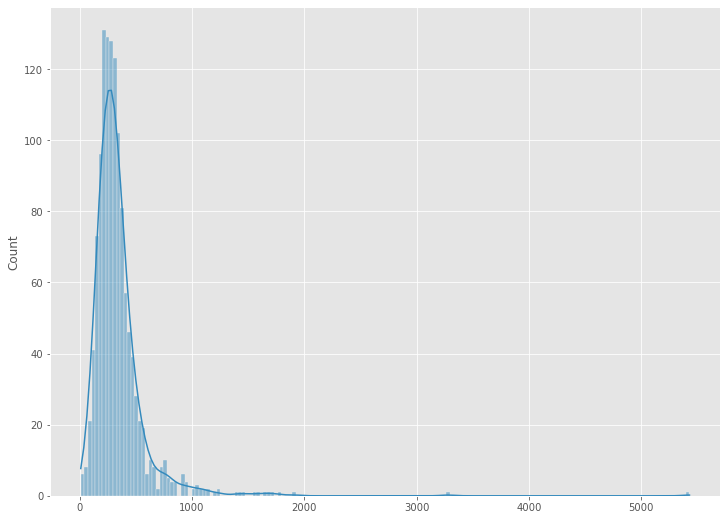

The mean of word count in this database is 342.21 and its median is 292.50


In [32]:
# We plot the distribution of the amount of words of each artist

word_count = list(map(word_count, norm_corpus_list))

plt.figure(figsize = (12,9))
ax = sns.histplot(data = word_count, 
             kde = True)
plt.show()


mean_data = "{:.2f}".format(np.mean(word_count))
median_data = "{:.2f}".format(np.median(word_count))
print(f"The mean of word count in this database is {mean_data} and its median is {median_data}")

In [33]:
# We call the group_artists function, and plot the distribution of the word count in a dataframe
group_artists(artists, word_count, "Word Count")

,Word Count
Artists,
Eminem,1225.047619
Lacuna Coil,1116.400000
Bon Jovi,555.529412
The Word Alive,544.307692
Halestorm,513.250000
Thousand FootKrutch,475.181818
In This Moment,460.863636
Bad Omens,456.526316
Bob Dylan,456.400000


In [34]:
!pip install better_profanity -q

In [35]:
# The better_profanity package is used to filter profanity from the lyrics and count the number of sentences

from better_profanity import profanity

def count_profanity_sentences(doc):
    doc_prof = [profanity.censor(word) for word in str(doc).split(" ")]
    doc_prof = [word for word in doc_prof if "*" in word]
    return len(doc_prof)

In [36]:
# We call the group_artists function, and plot the distribution of the profanity sentences count in a dataframe

profanity_sentences_count = list(map(count_profanity_sentences, norm_corpus_list))

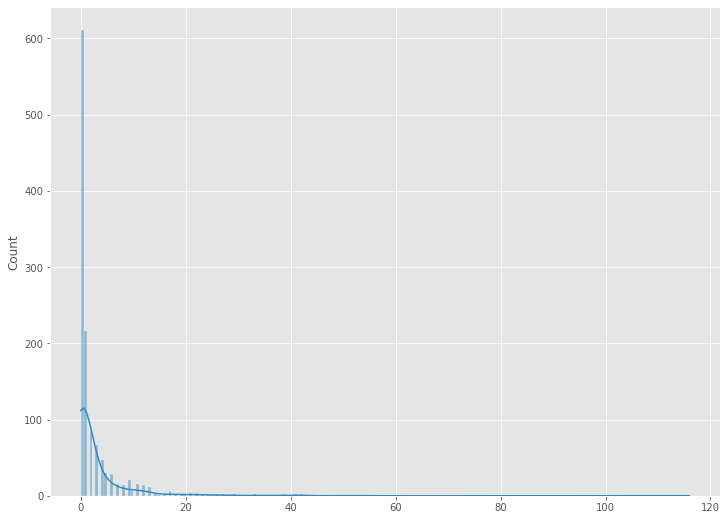

The mean of profanity sentences count in this database is 2.98 and its median is 1.00


In [37]:
# We plot the distribution of the profanity sentences count of each artist
plt.figure(figsize = (12,9))
ax = sns.histplot(data = profanity_sentences_count, 
             kde = True)
plt.show()


mean_data = "{:.2f}".format(np.mean(profanity_sentences_count))
median_data = "{:.2f}".format(np.median(profanity_sentences_count))
print(f"The mean of profanity sentences count in this database is {mean_data} and its median is {median_data}")

In [38]:
# We call the group_artists function, and plot the distribution of the profanity sentences count in a dataframe
group_artists(artists, profanity_sentences_count, "Profanity Count")

,Profanity Count
Artists,
Eminem,25.571429
Red,21.708333
Korn,8.958333
In This Moment,6.409091
Whitechapel,5.578947
Halestorm,5.500000
The Amity Affliction,4.818182
Bad Omens,4.736842
Motley crue,4.470588
